https://www.geeksforgeeks.org/generating-word-cloud-python/
https://towardsdatascience.com/how-to-create-beautiful-word-clouds-in-python-cfcf85141214
https://github.com/nltk/nltk/wiki/FAQ

In [9]:
import pandas as pd

df_ufo = pd.read_csv('F:\\d10\\Projects\\bigfoots-ufos-ghosts-oh-my\\data\\nuforc_reports.csv')
df_big = pd.read_csv('F:\\d10\\Projects\\bigfoots-ufos-ghosts-oh-my\\data\\bfro_reports_geocoded.csv')

In [2]:
df.head()

,summary,country,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,city_location
0,MADAR Node 100,USA,Mountlake Terrace,WA,2019-06-23T18:53:00,NaN,NaN,Occurred : 6/23/2019 18:53 (Entered as : 06/2...,http://www.nuforc.org/webreports/reports/147/S...,MADAR Node 100,2019-06-27T00:00:00,47.794100,-122.306600,POINT(-122.3066 47.7941)
1,Steady flashing object with three lights hover...,USA,Hamden,CT,2019-06-23T20:00:00,light,5 hours,Occurred : 6/23/2019 20:00 (Entered as : 6/23...,http://www.nuforc.org/webreports/reports/147/S...,Steady flashing object with three lights hover...,2019-06-27T00:00:00,41.373941,-72.921325,POINT(-72.92132480000001 41.37394080000001)
2,"Group of several orange lights, seemingly circ...",USA,Charlottesville,VA,2019-06-20T23:28:00,circle,15 seconds,Occurred : 6/20/2019 23:28 (Entered as : 06/2...,http://www.nuforc.org/webreports/reports/146/S...,"Group of several orange lights, seemingly circ...",2019-06-27T00:00:00,38.055968,-78.494482,POINT(-78.4944820642978 38.05596818950931)
3,Dropped in flashed a few times and shot off 5 ...,USA,Lincoln Park,MI,2019-06-21T00:00:00,light,2 minutes,Occurred : 6/21/2019 00:00 (Entered as : 06/2...,http://www.nuforc.org/webreports/reports/146/S...,Dropped in flashed a few times and shot off 5 ...,2019-06-27T00:00:00,42.238500,-83.178300,POINT(-83.1783 42.2385)
4,"Location: While traveling in a TGV, from Lille...",France,Douai (France),NaN,2019-06-07T20:00:00,cigar,5 minutes,Occurred : 6/7/2019 20:00 (Entered as : 06/07...,http://www.nuforc.org/webreports/reports/146/S...,"Location: While traveling in a TGV, from Lill...",2019-06-27T00:00:00,NaN,NaN,NaN


In [3]:
!pip install wordcloud

In [4]:
!pip install nltk

In [5]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\seanm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\seanm\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seanm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
df['latitude'] = df['city_latitude']
df['longitude'] = df['city_longitude']
df.drop(columns=['city_latitude', 'city_longitude'], inplace=True)
df.dropna(subset=['summary'], inplace=True)
df.head()

,summary,country,city,state,date_time,shape,duration,stats,report_link,text,posted,city_location,latitude,longitude
0,MADAR Node 100,USA,Mountlake Terrace,WA,2019-06-23T18:53:00,NaN,NaN,Occurred : 6/23/2019 18:53 (Entered as : 06/2...,http://www.nuforc.org/webreports/reports/147/S...,MADAR Node 100,2019-06-27T00:00:00,POINT(-122.3066 47.7941),47.794100,-122.306600
1,Steady flashing object with three lights hover...,USA,Hamden,CT,2019-06-23T20:00:00,light,5 hours,Occurred : 6/23/2019 20:00 (Entered as : 6/23...,http://www.nuforc.org/webreports/reports/147/S...,Steady flashing object with three lights hover...,2019-06-27T00:00:00,POINT(-72.92132480000001 41.37394080000001),41.373941,-72.921325
2,"Group of several orange lights, seemingly circ...",USA,Charlottesville,VA,2019-06-20T23:28:00,circle,15 seconds,Occurred : 6/20/2019 23:28 (Entered as : 06/2...,http://www.nuforc.org/webreports/reports/146/S...,"Group of several orange lights, seemingly circ...",2019-06-27T00:00:00,POINT(-78.4944820642978 38.05596818950931),38.055968,-78.494482
3,Dropped in flashed a few times and shot off 5 ...,USA,Lincoln Park,MI,2019-06-21T00:00:00,light,2 minutes,Occurred : 6/21/2019 00:00 (Entered as : 06/2...,http://www.nuforc.org/webreports/reports/146/S...,Dropped in flashed a few times and shot off 5 ...,2019-06-27T00:00:00,POINT(-83.1783 42.2385),42.238500,-83.178300
4,"Location: While traveling in a TGV, from Lille...",France,Douai (France),NaN,2019-06-07T20:00:00,cigar,5 minutes,Occurred : 6/7/2019 20:00 (Entered as : 06/07...,http://www.nuforc.org/webreports/reports/146/S...,"Location: While traveling in a TGV, from Lill...",2019-06-27T00:00:00,NaN,NaN,NaN


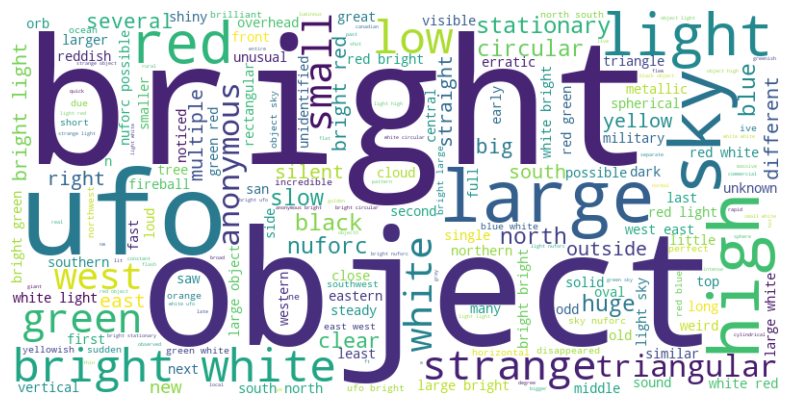

In [7]:


def preprocess_text(text):
    
    if pd.isnull(text):
        text = ''  
    else:
        text = str(text)  
    
    text = text.lower()
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    tokens = word_tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

def extract_adjectives(tokens):
    tagged = nltk.pos_tag(tokens)
    adjectives = [word for word, tag in tagged if tag in ('JJ', 'JJR', 'JJS')]
    return adjectives

def generate_word_cloud(adjectives):
    text = ' '.join(adjectives)
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()



all_adjectives = []

for index, row in df.iterrows():
    text = row['summary']  
    tokens = preprocess_text(text)
    adjectives = extract_adjectives(tokens)
    all_adjectives.extend(adjectives)

generate_word_cloud(all_adjectives)


In [8]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

def preprocess_text(text):
    
    if pd.isnull(text):
        text = ''  
    else:
        text = str(text)  
    
    text = text.lower()
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    tokens = word_tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

def extract_adjectives(tokens):
    tagged = nltk.pos_tag(tokens)
    adjectives = [word for word, tag in tagged if tag in ('JJ', 'JJR', 'JJS')]
    return adjectives

def generate_word_cloud(adjectives):
    text = ' '.join(adjectives)
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()



all_adjectives = []

for index, row in df_big.iterrows():
    text = row['observed']  
    tokens = preprocess_text(text)
    adjectives = extract_adjectives(tokens)
    all_adjectives.extend(adjectives)

generate_word_cloud(all_adjectives)


NameError: name 'df_big' is not defined

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

def preprocess_text(text):
    
    if pd.isnull(text):
        text = ''  
    else:
        text = str(text)  
    
    text = text.lower()
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    tokens = word_tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

def extract_adjectives(tokens):
    tagged = nltk.pos_tag(tokens)
    adjectives = [word for word, tag in tagged if tag in ('JJ', 'JJR', 'JJS')]
    return adjectives

def generate_word_cloud(adjectives):
    text = ' '.join(adjectives)
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()



all_adjectives = []

for index, row in df_big.iterrows():
    text = row['conditions']  
    tokens = preprocess_text(text)
    adjectives = extract_adjectives(tokens)
    all_adjectives.extend(adjectives)

generate_word_cloud(all_adjectives)

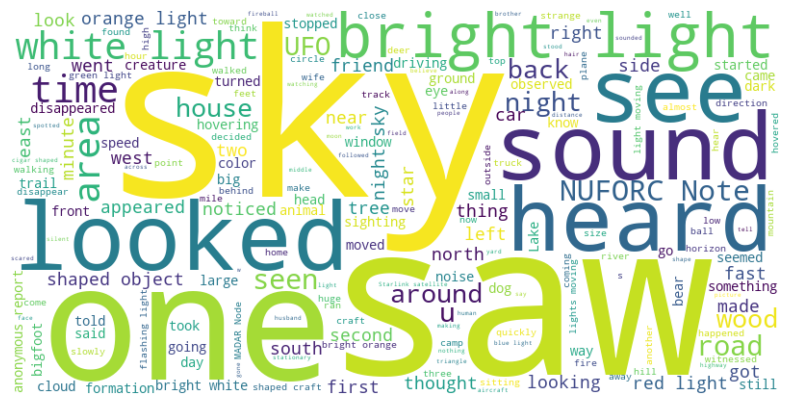

In [11]:
# word cloud combining ufo and bigfoot summaries

combined_text = ' '.join(df_ufo['summary'].dropna()) + ' ' + ' '.join(df_big['observed'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
